## **Image Classification Using CNN on CIFAR10 dataset**

The dataset contain 60000 32x32 px colour images in 10 classes. Here are some sample images from the dataset:

<img src="https://miro.medium.com/max/709/1*LyV7_xga4jUHdx4_jHk1PQ.png" style="max-width:480px">

In [1]:
# Importing Libraries
import os
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

Now we will move forward and start working on training sets

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

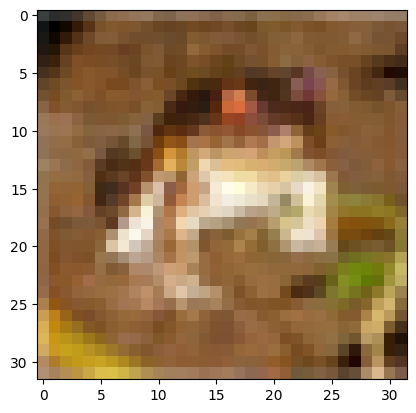

In [8]:
plt.imshow(x_train[0])

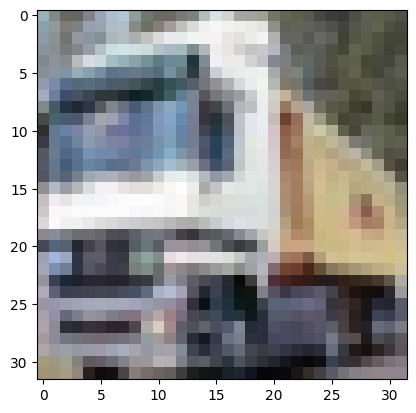

In [9]:
plt.imshow(x_train[1])

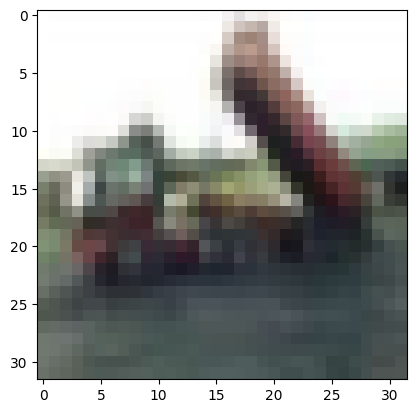

In [10]:
plt.imshow(x_train[2])

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
#Reshaping the y_train set
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
classes[6]

'frog'

In [15]:
classes[9]

'truck'

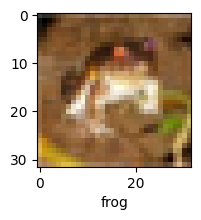

In [16]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train, y_train, 0)

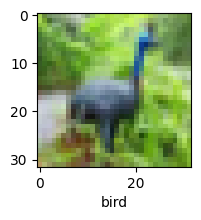

In [17]:
plot_sample(x_train, y_train, 6)

In [18]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [19]:
x_train[0] / 255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

**Preprocessing Scale Images**

In [20]:
x_train_scaled = x_train /255
x_test_scaled = x_test /255

In [21]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [22]:
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [23]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

**Model Building And Training**

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),  #Flatten layer s the first layer
    keras.layers.Dense(3000, activation='relu'),  #Dense layers are the deep layers
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

c:\Users\AYESHA QAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(x_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 103ms/step - accuracy: 0.3082 - loss: 1.9243
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.4221 - loss: 1.6421
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.4512 - loss: 1.5536
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.4744 - loss: 1.4895
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.4884 - loss: 1.4420


**Trying Artificial Neural Network (ANN) for model building**

In [27]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),  #Flatten layer s the first layer
    keras.layers.Dense(3000, activation='relu'),  #Dense layers are the deep layers
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [28]:
ann.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(x_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.5075 - loss: 1.3952
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.5296 - loss: 1.3517
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.5407 - loss: 1.3085
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.5548 - loss: 1.2775
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.5621 - loss: 1.2556


In [30]:
ann.evaluate(x_test, y_test)

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 10)